# TE52MI - Algebre linéaire et réduction de dimension

## TP . Analyse en Composantes Principales (ACP ou PCA en anglais)

### Description

L'objectif de ce TP est d'étudier et mettre en œuvre l'analyse en composantes principales (ACP) comme méthode de réduction de dimensionnalité, sur des données réelles. Nous appliquerons l'ACP sur un jeu de données de vins Italiens, qui correspond à l'analyse chimique de vins cultivés dans la même région en Italie mais issus de trois cépages différents (trois types de vin; trois classes). Ce jeu de données est composé de $n=178$ observations, décrivant les quantités de $d=13$ constituants trouvés dans chacun d'eux. 


### Rappels de cours

Pour un ensemble de points en dimensions $d$, l'ACP vise à trouver un sous-espace linéaire de dimension $k \leq d$ tel que les points se trouvent principalement sur ce sous-espace. Un tel sous-espace est choisi afin de minimiser la variance des données et peut être spécifié par $d$ vecteurs orthogonaux qui forment un nouveau système de coordonnées, appelé les composantes principales. La condition pour que la représentation soit de bonne qualité est que seul $ k << d$ composantes suffisent pour approximer l'espace couvert par les $d$
axes originaux. Dans ce TP, nous prendrons $ k=2 $ et nous admettrons que pour ce jeu de donnée cela suffit.



### Tâches à effectuer dans ce TP

Compléter les champs de code manquant, entre `### TODO ###` et `### ENDO ###` afin de
mettre en œuvre la technique de l'ACP
- Compléter la fonction ACP, qui a pour paramètre X qui est le jeu de donnée et $k$ le nombres de composantes principales.Cette fonction appliquera la méthode de l'ACP et  renverra au moins la matrice des projettés.
Dans ce TP, on projettera sur un SEV de dimension 2 (i.e k=2).
- Calculer le ratio quotient entre la somme des deux premières valeurs propres utilisées et divisée la somme des valeurs propres (section 3).
- Représenter le jeu de donnée dans le plan de projection de l'ACP (section 4)
- Lire le complément de cours sur le cercle des corrélations et compléter le code pour tracer le cercle des corrélations des variables (section 5)

Pour ce TP, vous ne devez pas importer d'autres modules. Toutes les personnes du groupes doivent être capable d'expliquer toute partie écrite par vos soins.
Pour que ce TP soit noté, il faudra que vous ayez rendu le TP (un par groupe de deux, exceptionnellement trois), que vous soyez présent au rendez-vous que vous ferez prendrez (voir moodle), sinon vous serez noté comme absent.

# 1. Lire le jeu de données

In [1]:
# Load data (Wine dataset)
#!/usr/bin/env /Applications/MAMP/Library/bin/python

import mysql.connector

config = {
    'user': 'root',
    'password': 'root',
    'host': '127.0.0.1',
    'port': 8889,
    'database': 'ecotourisme',
    'raise_on_warnings': True
}

cnx = mysql.connector.connect(**config)

cursor = cnx.cursor(dictionary=True)

cursor.execute('SELECT pays.nom as pays, s.id_pays, s.annee, s.gpi, t.arriveesTotal as arriveesTotal, t.arriveesAvion, e.pibParHab, eco.co2,  eco.GES_hab as gesParHab, eco.ges as ges FROM surete as s, tourisme as t, economie as e, ecologie as eco, pays where pays.id = s.id_pays and s.id_pays = t.id_pays AND t.id_pays = e.id_pays AND e.id_pays = eco.id_pays AND s.annee = t.annee AND t.annee = e.annee AND e.annee = eco.annee AND e.annee=2020;')
results = cursor.fetchall()

dataset = []
for row in results:
        pays = row['pays']
        id_pays = row['id_pays']
        annee = row['annee']
        gpi = row['gpi']
        arriveesTotal = row['arriveesTotal']
        arriveesAvion = row['arriveesAvion']
        pibParHab = row['pibParHab']
        co2 = row['co2']
        gesParHab = row['gesParHab']
        ges = row['ges']
        dataset.append({'pays': pays,'id_pays': id_pays, 'arriveesTotal': arriveesTotal, 'arriveesAvion': arriveesAvion, 'gpi': gpi, 'pibParHab': pibParHab, 'co2': co2, 'gesParHab': gesParHab, 'ges': ges})

p = len(dataset[0])  # Number of columns in the dataset

cnx.close()

print(dataset)



[{'pays': 'Angola', 'id_pays': 'AO', 'arriveesTotal': 64, 'arriveesAvion': 64, 'gpi': 1.918, 'pibParHab': 6032, 'co2': 19814.5, 'gesParHab': 6.08528, 'ges': 70781.0562}, {'pays': 'Albanie', 'id_pays': 'AL', 'arriveesTotal': 2658, 'arriveesAvion': 270, 'gpi': 1.774, 'pibParHab': 13256, 'co2': 4383.2, 'gesParHab': 2.52405, 'ges': 8304.29494}, {'pays': 'Émirats arabes unis', 'id_pays': 'AE', 'arriveesTotal': 8084, 'arriveesAvion': 5963, 'gpi': 2.022, 'pibParHab': 67668, 'co2': 188088.7, 'gesParHab': 135.39, 'ges': 249927.7494}, {'pays': 'Argentine', 'id_pays': 'AR', 'arriveesTotal': 3096, 'arriveesAvion': 694, 'gpi': 1.948, 'pibParHab': 19685, 'co2': 154535.9, 'gesParHab': 11.1546, 'ges': 361433.0173}, {'pays': 'Arménie', 'id_pays': 'AM', 'arriveesTotal': 375, 'arriveesAvion': 199, 'gpi': 1.935, 'pibParHab': 13358, 'co2': 6746.6, 'gesParHab': 2.95595, 'ges': 10422.04117}, {'pays': 'Australie', 'id_pays': 'AU', 'arriveesTotal': 1828, 'arriveesAvion': 1789, 'gpi': 1.434, 'pibParHab': 48748,

# 2. Appliquer l'ACP

In [2]:
import numpy as np
import pandas as pd

def pca(X, k):
    ### TODO ###
    # Centrer et réduire les données
    X = (X - np.mean(X, axis=0)) / (np.std(X, axis=0)) # rajout d'une canstante pour ne jmais diviser par 0 

    # Calculer la matrice de covariance
    matrice_cov = np.cov(X.T)
    
    # Obtenir les valeurs propres et les vecteurs propres de la matrice de covariance
    valeurs_propres, vecteurs_propres = np.linalg.eig(matrice_cov)

    # Trier les valeurs propres par ordre décroissant 
    indice = valeurs_propres.argsort()[::-1]
    valeurs_propres = valeurs_propres[indice]

    # Trier les vecteurs propres en fonction des valeurs propres associées
    vecteurs_propres = vecteurs_propres[:,indice]
    
    # Projeter orthogonale du nuage de point sur un plan P de Rp 
    # de manière à perdre le moins d’information possible sur la forme du nuage.

    # Prendre les deux plus grandes valeurs propres
    W = vecteurs_propres[:,:k]
    
    # Projeter le nuage de point sur le plan engendré par les 2 premiers vecteurs (=> On maximise la variance)
    matrice_proj = np.dot(X, W)
    
    return matrice_proj, valeurs_propres, vecteurs_propres, matrice_cov
    ### ENDO ###

# Supposons que 'dataset' est votre dictionnaire
df = pd.DataFrame(dataset)

# Supprimer les colonnes non numériques
df = df.iloc[:, 2:] 

# supprime les lignes avec Nan 
data = df.dropna()

df = data.values

print(df)

# Appliquer la ACP sur le jeu de données
matrice_proj, valeurs_propres, vecteurs_propres, matrice_cov = pca(df, 2)

# Afficher les résultats        
print("Matrice de projection :", valeurs_propres)


[[6.40000000e+01 6.40000000e+01 1.91800000e+00 6.03200000e+03
  1.98145000e+04 6.08528000e+00 7.07810562e+04]
 [2.65800000e+03 2.70000000e+02 1.77400000e+00 1.32560000e+04
  4.38320000e+03 2.52405000e+00 8.30429494e+03]
 [8.08400000e+03 5.96300000e+03 2.02200000e+00 6.76680000e+04
  1.88088700e+05 1.35390000e+02 2.49927749e+05]
 [3.09600000e+03 6.94000000e+02 1.94800000e+00 1.96850000e+04
  1.54535900e+05 1.11546000e+01 3.61433017e+05]
 [3.75000000e+02 1.99000000e+02 1.93500000e+00 1.33580000e+04
  6.74660000e+03 2.95595000e+00 1.04220412e+04]
 [1.82800000e+03 1.78900000e+03 1.43400000e+00 4.87480000e+04
  3.78996800e+05 3.37827000e+01 5.71903120e+05]
 [7.96000000e+02 2.19000000e+02 2.04600000e+00 1.37270000e+04
  3.43050000e+04 7.50842000e+00 5.53519938e+04]
 [3.54000000e+02 1.21000000e+02 2.20600000e+00 3.18600000e+03
  7.98040000e+03 3.20288000e+00 1.61905320e+04]
 [6.70000000e+01 5.40000000e+01 2.29400000e+00 2.09400000e+03
  5.45670000e+03 3.58009000e+00 3.22628163e+04]
 [1.909000

# 3. Ratio

Ce ratio peut être interprété comme le pourcentage de l'inertie du nuage de points qui est conservé par la projection sur le plan factoriel.

In [3]:
# Calculer le ratio 
ratio = sum(valeurs_propres[:2]) / sum(valeurs_propres)

print("Le ratio vaut {:.2%}".format(ratio))


Le ratio vaut 65.82%


# 4. Visualisation du la projection des données sur le premier plan factoriel

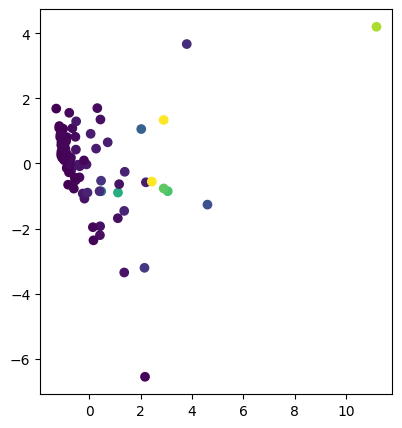

In [4]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(10,5))

plt.subplot(121)
df = df[:,0]

plt.scatter(matrice_proj[:,0], matrice_proj[:,1], c=df)

plt.show()

# 5. Cercle de correlation

La méthode adoptée va être différente de celle présentée dans le cours et c'est cette méthode présentée ci-dessous qu'il va falloir utiliser.

Ici on a $p=13$ variables.

Soit $U=\begin{pmatrix}
u_1\\
u_2\\
\vdots \\
u_p
\end{pmatrix}$ et $V=\begin{pmatrix}
v_1\\
v_2\\
\vdots \\
v_p
\end{pmatrix}$ les deux vecteurs propres qui engendrent le premier plan factoriel, associés aux vecteurs propres $\lambda_1$ et $\lambda_2$.

Le jeu de donnée est consitituée de $n$ individus et de $p$ variables notées $D_1,\cdots D_p$.

Pour tout $k \in \{ 1, \cdots,p   \} $ la projection sur le cercle des corrélation de la variable $D_k$ a pour coordonnées $D'_k=(\sqrt{\lambda_1}u_k, \sqrt{\lambda_2}v_k)$.

Il faudra donc, dans cette partie, calculer les coordonnées des $D'_k$, puis utiliser de manière judicieuse le bout de programme fourni afin d'afficher le cercle des corrélations.




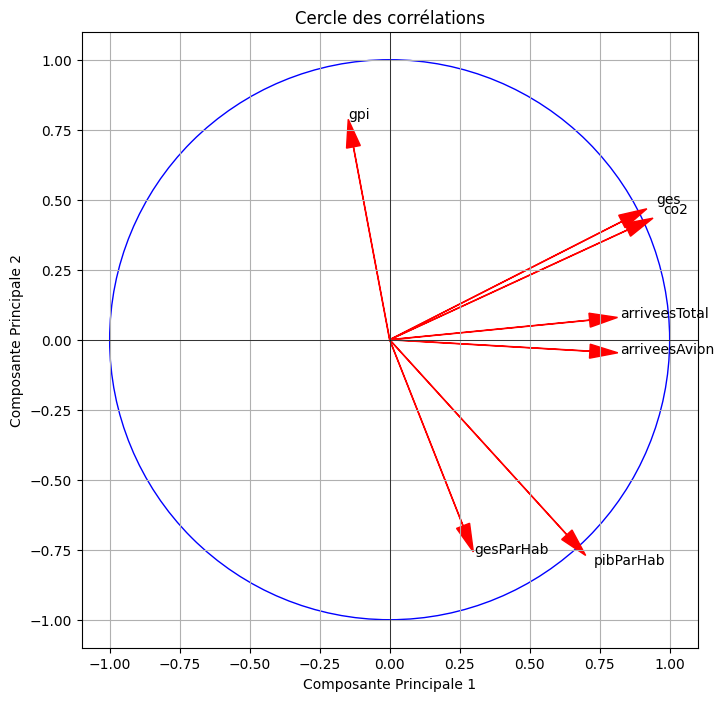

In [5]:
### TODO ### 

p = 7

# Matrice 0 de dimention [p*2] 
corvar = np.zeros((p, 2))

# Boucle pour calculer les coordonnées Dk' 
for i in range(p):
    corvar[i, 0] = np.sqrt(valeurs_propres[0]) * vecteurs_propres[i, 0]
    corvar[i, 1] = np.sqrt(valeurs_propres[1]) * vecteurs_propres[i, 1]

### ENDO ###    
# Créer le cercle des corrélations dans un repère orthonormé
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.add_artist(plt.Circle((0, 0), 1, color='blue', fill=False))

# Afficher les flèches correspondant aux variables
for i, txt in enumerate(range(p)):
    plt.arrow(0, 0, corvar[i, 0], corvar[i, 1], head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(corvar[i, 0] * 1.15, corvar[i, 1] * 1.15, data.columns[i], color='black')

# Réglages esthétiques
plt.title('Cercle des corrélations')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.grid(True)
plt.show()

# Interprétation d'un cercle de corrélation
Pour mieux comprendre l’ACP, nous voulions apprendre à l'interpréter. Après avoir lu le cours et de nombreux articles sur le sujet, nous avons compris qu'il y a 3 points importants pour pouvoir interpréter ce cercle : 

_ **La direction des vecteurs propres:** indique la direction dans laquelle la variable contribue le plus à la variabilité des données. Si deux vecteurs pointent dans la même direction, cela suggère une corrélation positive entre les variables correspondantes. 

_ **La longueur des vecteurs propres:** est proportionnelle à la variance de la variable qu'il représente. Ainsi, plus le vecteur est long, plus la variable qu'il représente contribue à la variabilité totale des données. 

_ **La dispersion des variables:**
* Si **plusieurs vecteurs pointent dans la même direction**, cela indique une corrélation positive entre les variables correspondantes. Cela signifie que lorsque la valeur d'une variable augmente, la valeur des autres variables augmentera également. 
* Si **les vecteurs ont des sens opposés**, cela indique une corrélation négative entre les variables correspondantes. Cela signifie que lorsque la valeur d'une variable augmente, la valeur des autres variables diminue.
* **Des vecteurs orthogonaux** indiquent une absence de corrélation entre les variables correspondantes. Cela signifie que les variables évoluent indépendamment les unes des autres.

# Vérification de nos données 

In [6]:
# Vérification de la matrice de covariance 

# Variance = 1
print("Les coefficients diagonaux valent: {:.2}".format(matrice_cov[0,0]))

# Cov compris entre -1 et 1 
#print(matrice_cov>=1)
#print(matrice_cov<=-1)

# Somme des valeurs propres = p
somme_valeur_propre = sum(valeurs_propres)
print("La somme des valeurs propres : ",(somme_valeur_propre))

#  la somme des valeurs propres doit etre egales à p (=6)
 

Les coefficients diagonaux valent: 1.0
La somme des valeurs propres :  7.076086956521738
